In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

In [4]:
N_W = 1001
start = 0
end = 3000000
expand_fac = 5

In [4]:
evenly_spaced_grid = np.linspace(0, 1, N_W)


In [5]:
expand_grid = start + (end - start)*evenly_spaced_grid**expand_fac

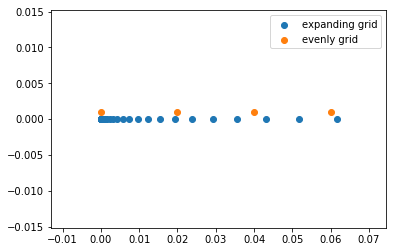

In [76]:
y = np.zeros(N_W)
plt.scatter(expand_grid[:30], y[:30])
plt.scatter([0, 0.02, 0.04, 0.06], [0.001, 0.001, 0.001, 0.001])
plt.legend(['expanding grid', 'evenly grid'])
plt.show()

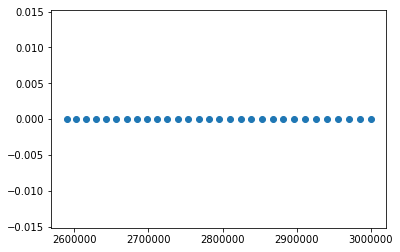

In [27]:
plt.scatter(expand_grid[-30:], y[-30:])
plt.show()

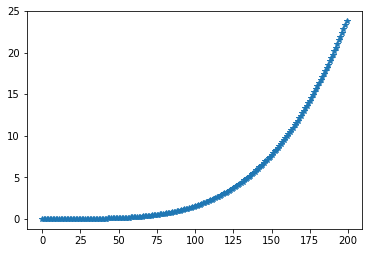

In [34]:
plt.plot(np.diff(expand_grid)[:200], '*')
plt.show()

## Graph of consumption function

### For Baseline Case

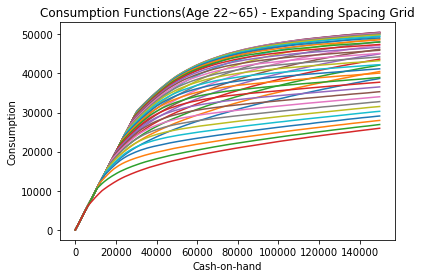

In [7]:
base_path = '/Users/Quintus/Google Drive/Dynamic Programming/code'
c_func_fp = os.path.join(base_path, 'results', 'Iteration_2.xlsx')
c_df = pd.read_excel(c_func_fp)

end = 15000000/100
grid_w = np.arange(1, end, 100)
for age in range(22, 66):
    spline = CubicSpline(c_df[str(100)], c_df[str(age)], bc_type='natural')
    c = spline(grid_w)
    plt.plot(grid_w, c, label=str(age))
plt.xlabel('Cash-on-hand')
plt.ylabel('Consumption')
plt.title('Consumption Functions(Age 22~65) - Expanding Spacing Grid')
# plt.legend()
plt.show()

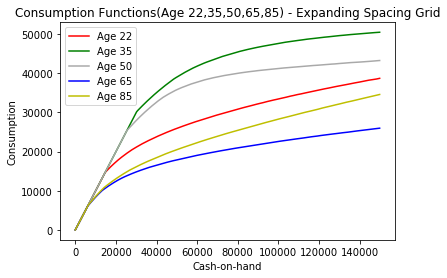

In [8]:
spline = CubicSpline(c_df[str(100)], c_df['22'], bc_type='natural')
c = spline(grid_w)
plt.plot(grid_w, c, color='r', label='Age 22')

spline = CubicSpline(c_df[str(100)], c_df['35'], bc_type='natural')
c = spline(grid_w)
plt.plot(grid_w, c, color='g', label='Age 35')

spline = CubicSpline(c_df[str(100)], c_df['50'], bc_type='natural')
c = spline(grid_w)
plt.plot(grid_w, c, color='darkgrey', label='Age 50')

spline = CubicSpline(c_df[str(100)], c_df['65'], bc_type='natural')
c = spline(grid_w)
plt.plot(grid_w, c, color='b', label='Age 65')

spline = CubicSpline(c_df[str(100)], c_df['85'], bc_type='natural')
c = spline(grid_w)
plt.plot(grid_w, c, color='y', label='Age 85')

plt.xlabel('Cash-on-hand')
plt.ylabel('Consumption')
plt.title('Consumption Functions(Age 22,35,50,65,85) - Expanding Spacing Grid')
plt.legend()
plt.show()

### Value Functions

In [142]:
N_W = 501
LOWER_BOUND_W = 1
UPPER_BOUND_W = 15000000
EXPAND_FAC = 4

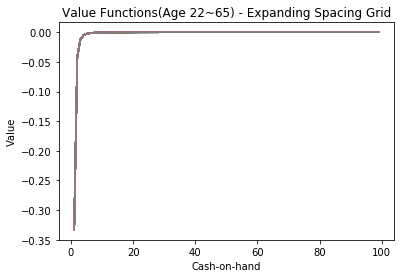

In [143]:
even_grid = np.linspace(0, 1, N_W)
grid_w = LOWER_BOUND_W + (UPPER_BOUND_W - LOWER_BOUND_W) * even_grid**EXPAND_FAC

base_path = '/Users/Quintus/Google Drive/Dynamic Programming/code'
v_func_fp = os.path.join(base_path, 'results', f'BSL Loop on gamma1-4, exp{EXPAND_FAC}w, evenc, HS', 'v function_BSL_4.0.xlsx')
v_df = pd.read_excel(v_func_fp)

end = 100
interp_points = np.arange(1, end)
for age in range(22, 100):
    spline = CubicSpline(grid_w, v_df[str(age)], bc_type='natural')
    v = spline(interp_points)
    plt.plot(interp_points, v, label=str(age))
# plt.xlim([-1, 500])
plt.xlabel('Cash-on-hand')
plt.ylabel('Value')
plt.title('Value Functions(Age 22~65) - Expanding Spacing Grid')
# plt.legend()
plt.show()

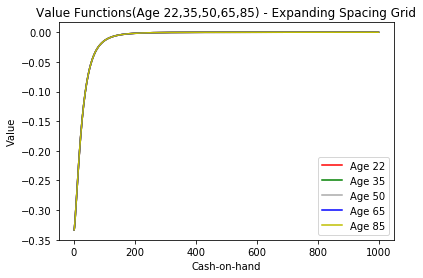

In [45]:
spline = CubicSpline(grid_w, v_df['22'], bc_type='natural')
v = spline(interp_points)
plt.plot(interp_points, v, color='r', label='Age 22')

spline = CubicSpline(grid_w, v_df['35'], bc_type='natural')
v = spline(interp_points)
plt.plot(interp_points, v, color='g', label='Age 35')

spline = CubicSpline(grid_w, v_df['50'], bc_type='natural')
v = spline(interp_points)
plt.plot(interp_points, v, color='darkgrey', label='Age 50')

spline = CubicSpline(grid_w, v_df['65'], bc_type='natural')
v = spline(interp_points)
plt.plot(interp_points, v, color='b', label='Age 65')

spline = CubicSpline(grid_w, v_df['85'], bc_type='natural')
v = spline(interp_points)
plt.plot(interp_points, v, color='y', label='Age 85')

plt.xlabel('Cash-on-hand')
plt.ylabel('Value')
plt.title('Value Functions(Age 22,35,50,65,85) - Expanding Spacing Grid')
plt.legend()
plt.show()

In [81]:
def utility(values, gamma):
    return values**(1-gamma) / (1-gamma)

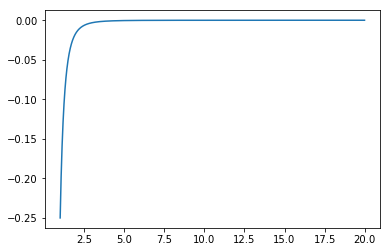

In [136]:
gamma = 5

c = np.arange(1, end, 0.01).astype(float)
u = utility(c, gamma)

plt.plot(c, u)
plt.show()

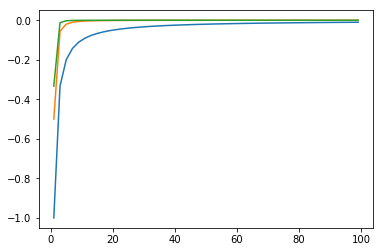

In [27]:
c = np.arange(1, 100, 2).astype(float)
for gamma in np.arange(2, 4.1, 1):
    u = utility(c, gamma)
    plt.plot(c, u)

plt.show()
